In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # New to version 0.22.2
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.state.value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
DE    0.018302
OK    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ','_')

In [8]:
df.area_code.unique()

array([415, 408, 510])

In [9]:
#sns.pairplot(df)

/Users/dan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

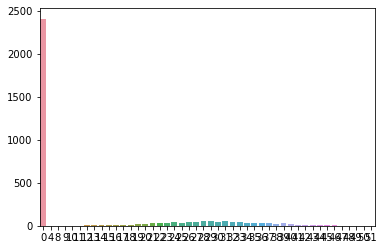

In [10]:
num_vmail_messages = df["number_vmail_messages"].value_counts()

sns.barplot(num_vmail_messages.index, num_vmail_messages.values, )


In [11]:
# Dropping 'state' (51 unique values) since 'area_code' (3 unique values) still gives location data with much less noise
# Dropping 'number_vmail_messages' to reduce noise since the binary value in 'voice_mail_plan' should suffice
# Dropping 'phone_number' because there are 3333 unique values and should have no affect on predicting churn
df.drop(['state', 'phone_number', 'number_vmail_messages'], axis=1, inplace=True)

In [12]:
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [13]:
# Dropping charges columns because of multicollinearity
df.drop(['total_day_charge','total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_intl_minutes      3333 non-null   float64
 11  total_intl_calls        3333 non-null   int64  
 12  customer_service_calls  3333 non-null   int64  
 13  churn                   3333 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object

In [15]:
df.describe()

,account_length,area_code,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856
std,39.822106,42.371290,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000
50%,101.000000,415.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000
75%,127.000000,510.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000
max,243.000000,510.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000


In [16]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [17]:
# Define X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# One Hot Encode 'area_code,'  'international_plan', and 'voice_mail_plan'
ohe = OneHotEncoder(sparse = False, drop='first')

X_cats_train = ohe.fit_transform(X_train[['area_code', 'international_plan', 'voice_mail_plan']])
X_cats_test = ohe.transform(X_test[['area_code', 'international_plan', 'voice_mail_plan']])

In [20]:
ohe.get_feature_names()

array(['x0_415', 'x0_510', 'x1_yes', 'x2_yes'], dtype=object)

In [21]:
# Back to a df
X_cats_train = pd.DataFrame(X_cats_train, columns = ohe.get_feature_names())
X_cats_test = pd.DataFrame(X_cats_test, columns = ohe.get_feature_names())

X_cats_train.head()

,x0_415,x0_510,x1_yes,x2_yes
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0


In [22]:
# Standard scale
scaler = StandardScaler()

X_num_train = scaler.fit_transform(X_train[[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])]])
X_num_test = scaler.transform(X_test[[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])]])

In [23]:
# Back to a df
X_num_train = pd.DataFrame(X_num_train, columns=[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])])
X_num_test = pd.DataFrame(X_num_test, columns=[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])])
X_num_train.head()

,account_length,area_code,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls
0,-0.814990,-0.516215,0.314915,0.082753,0.364534,-0.593606,0.328493
1,0.764260,-0.516215,-2.034434,-1.116512,1.080998,-0.185627,-0.425386
2,-0.338708,1.738922,0.614832,-1.866052,-0.607810,-1.409563,1.082372
3,-0.138168,-0.682383,0.414887,-0.067155,-0.914865,-1.001584,-1.179266
4,1.541351,1.738922,0.814777,1.032170,-0.556634,2.670222,-0.425386


In [24]:
X_num_train.drop('area_code', axis=1, inplace=True)
X_num_test.drop('area_code', axis=1, inplace=True)

In [25]:
X_num_train.head()

,account_length,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls
0,-0.814990,0.314915,0.082753,0.364534,-0.593606,0.328493
1,0.764260,-2.034434,-1.116512,1.080998,-0.185627,-0.425386
2,-0.338708,0.614832,-1.866052,-0.607810,-1.409563,1.082372
3,-0.138168,0.414887,-0.067155,-0.914865,-1.001584,-1.179266
4,1.541351,0.814777,1.032170,-0.556634,2.670222,-0.425386


In [26]:
# put X back together
X_train_processed = pd.concat([X_num_train, X_cats_train], axis=1)
X_test_processed = pd.concat([X_num_test, X_cats_test], axis=1)

X_train_processed.head()

,account_length,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,x0_415,x0_510,x1_yes,x2_yes
0,-0.814990,0.314915,0.082753,0.364534,-0.593606,0.328493,1.0,0.0,0.0,0.0
1,0.764260,-2.034434,-1.116512,1.080998,-0.185627,-0.425386,1.0,0.0,0.0,1.0
2,-0.338708,0.614832,-1.866052,-0.607810,-1.409563,1.082372,0.0,1.0,0.0,1.0
3,-0.138168,0.414887,-0.067155,-0.914865,-1.001584,-1.179266,0.0,0.0,1.0,1.0
4,1.541351,0.814777,1.032170,-0.556634,2.670222,-0.425386,0.0,1.0,0.0,0.0


In [27]:
X_train_processed = X_train_processed.rename(columns={"x1_yes": "int_plan_yes", "x2_yes": "vmail_plan_yes"})
X_test_processed = X_test_processed.rename(columns={"x1_yes": "int_plan_yes", "x2_yes": "vmail_plan_yes"})

In [28]:
X_train_processed.head()

,account_length,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,x0_415,x0_510,int_plan_yes,vmail_plan_yes
0,-0.814990,0.314915,0.082753,0.364534,-0.593606,0.328493,1.0,0.0,0.0,0.0
1,0.764260,-2.034434,-1.116512,1.080998,-0.185627,-0.425386,1.0,0.0,0.0,1.0
2,-0.338708,0.614832,-1.866052,-0.607810,-1.409563,1.082372,0.0,1.0,0.0,1.0
3,-0.138168,0.414887,-0.067155,-0.914865,-1.001584,-1.179266,0.0,0.0,1.0,1.0
4,1.541351,0.814777,1.032170,-0.556634,2.670222,-0.425386,0.0,1.0,0.0,0.0


### Logistic Regression Model

In [29]:
# Instantiate and fit our model
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced')

In [30]:
logreg.coef_

array([[ 0.05389734,  0.04227399,  0.03065284,  0.06313797, -0.13013144,
         0.52637193, -0.04148489,  0.14560768,  2.12542236, -0.95186353]])

In [31]:
logreg.intercept_

array([-0.24316678])

In [32]:
def evaluate(estimator, X_train, X_test, y_train, y_test, roc_auc='proba'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score
    '''
    # grab predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': # not all classifiers have decision_function
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif roc_auc == 'proba':
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'.")
    
    # print scores
    print("Train Scores")
    print("------------")  
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
    print("----" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")
    if type(test_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")
    
    # plot test confusion matrix
    plot_confusion_matrix(estimator, X_test, y_test, values_format=',.5g')
    plt.grid(False)
    plt.show()

[Link](https://www.google.com/)

Train Scores
------------
Accuracy: 0.7308553515450067
Precision: 0.2931547619047619
Recall: 0.6099071207430341
F1 Score: 0.39597989949748746
ROC-AUC: 0.7445236898837794
--------------------
Test Scores
-----------
Accuracy: 0.7190909090909091
Precision: 0.28023598820059
Recall: 0.59375
F1 Score: 0.3807615230460922
ROC-AUC: 0.7403989361702128


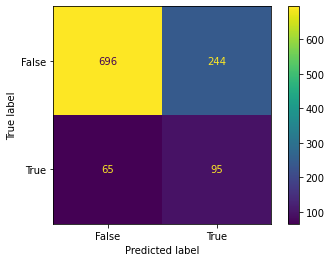

In [33]:
evaluate(logreg, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=3)

Train Scores
------------
Accuracy: 0.8943125839677564
Precision: 0.7919463087248322
Recall: 0.3653250773993808
F1 Score: 0.5
ROC-AUC: 0.9292869531389298
--------------------
Test Scores
-----------
Accuracy: 0.8454545454545455
Precision: 0.4107142857142857
Recall: 0.14375
F1 Score: 0.21296296296296297
ROC-AUC: 0.5930784574468085


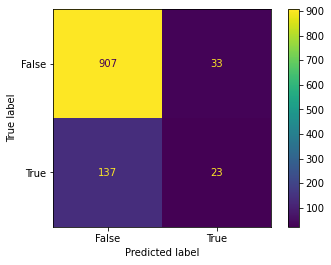

In [35]:
evaluate(knn, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.8781907747424988
Precision: 0.8
Recall: 0.21052631578947367
F1 Score: 0.3333333333333333
ROC-AUC: 0.8873300050248811
--------------------
Test Scores
-----------
Accuracy: 0.8572727272727273
Precision: 0.5405405405405406
Recall: 0.125
F1 Score: 0.20304568527918782
ROC-AUC: 0.6303025265957447


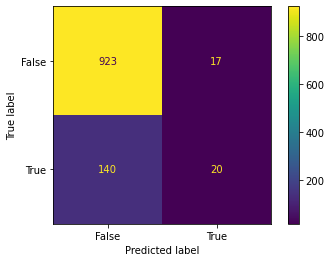

In [36]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_processed, y_train)
evaluate(knn_2, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
--------------------
Test Scores
-----------
Accuracy: 0.8427272727272728
Precision: 0.38596491228070173
Recall: 0.1375
F1 Score: 0.20276497695852533
ROC-AUC: 0.5976529255319148


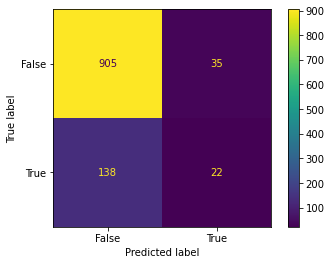

In [37]:
knn_3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_3.fit(X_train_processed, y_train)
evaluate(knn_3, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
--------------------
Test Scores
-----------
Accuracy: 0.8045454545454546
Precision: 0.3248407643312102
Recall: 0.31875
F1 Score: 0.3217665615141955
ROC-AUC: 0.6029920212765958


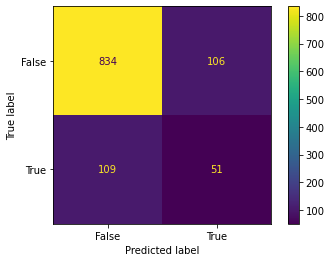

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_processed, y_train)
evaluate(dt, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.8571428571428571
Precision: 0.5056497175141242
Recall: 0.5541795665634675
F1 Score: 0.5288035450516986
ROC-AUC: 0.8073817126740473
--------------------
Test Scores
-----------
Accuracy: 0.8254545454545454
Precision: 0.4090909090909091
Recall: 0.45
F1 Score: 0.4285714285714286
ROC-AUC: 0.7179787234042553


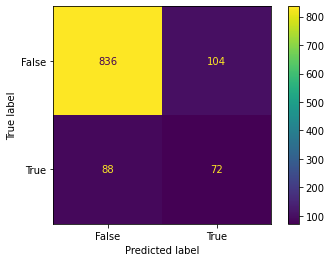

In [39]:
dt_2 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_2.fit(X_train_processed, y_train)
evaluate(dt_2, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.8714733542319749
Precision: 0.5502793296089385
Recall: 0.6099071207430341
F1 Score: 0.57856093979442
ROC-AUC: 0.8604744460473636
--------------------
Test Scores
-----------
Accuracy: 0.8081818181818182
Precision: 0.36507936507936506
Recall: 0.43125
F1 Score: 0.39541547277936967
ROC-AUC: 0.661595744680851


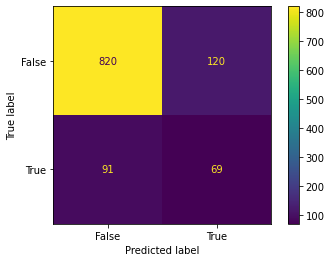

In [40]:
dt_3 = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
dt_3.fit(X_train_processed, y_train)
evaluate(dt_3, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.8575906851768921
Precision: 0.5072886297376094
Recall: 0.5386996904024768
F1 Score: 0.5225225225225225
ROC-AUC: 0.8567390141507141
--------------------
Test Scores
-----------
Accuracy: 0.84
Precision: 0.4550561797752809
Recall: 0.50625
F1 Score: 0.4792899408284023
ROC-AUC: 0.7572007978723405


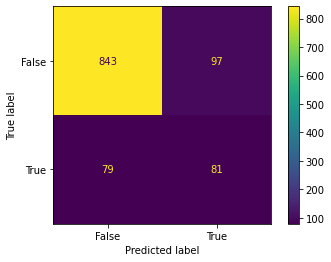

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_processed, y_train)
evaluate(rf, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.877742946708464
Precision: 0.6838235294117647
Recall: 0.28792569659442724
F1 Score: 0.40522875816993464
ROC-AUC: 0.8280590990874168
--------------------
Test Scores
-----------
Accuracy: 0.8618181818181818
Precision: 0.5606060606060606
Recall: 0.23125
F1 Score: 0.32743362831858414
ROC-AUC: 0.7003922872340425


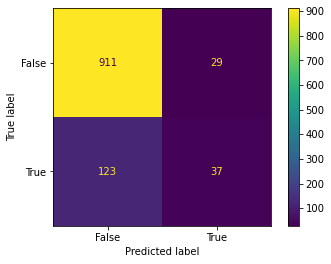

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada.fit(X_train_processed, y_train)
evaluate(ada, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.9081952530228392
Precision: 0.927536231884058
Recall: 0.39628482972136225
F1 Score: 0.5553145336225597
ROC-AUC: 0.8315594962151298
--------------------
Test Scores
-----------
Accuracy: 0.8709090909090909
Precision: 0.6363636363636364
Recall: 0.2625
F1 Score: 0.3716814159292035
ROC-AUC: 0.7600398936170213


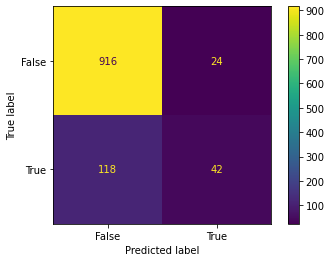

In [43]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb.fit(X_train_processed, y_train)
evaluate(xgb, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Train Scores
------------
Accuracy: 0.9055082848186297
Precision: 0.9117647058823529
Recall: 0.38390092879256965
F1 Score: 0.5403050108932462
ROC-AUC: 0.8763392929505778
--------------------
Test Scores
-----------
Accuracy: 0.8690909090909091
Precision: 0.6481481481481481
Recall: 0.21875
F1 Score: 0.3271028037383178
ROC-AUC: 0.7366422872340426


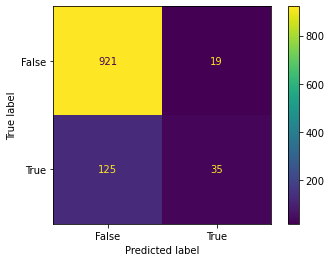

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.1, random_state=42)
gbm.fit(X_train_processed, y_train)
evaluate(gbm, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

In [56]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [250, 500, 750],
    'max_depth': [None, 1, 5],
    'max_leaf_nodes': [10, 50, 75],
}

rf_gridsearch = RandomForestClassifier(class_weight='balanced')

# Instantiate gridsearch
clf = GridSearchCV(rf_gridsearch, params, scoring='f1_macro')

clf.fit(X_train_processed, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 1, 5],
                         'max_leaf_nodes': [10, 50, 75],
                         'n_estimators': [250, 500, 750]},
             scoring='f1_macro')

In [46]:
clf.best_score_

0.7129758204150499

In [47]:
clf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_leaf_nodes=75,
                       n_estimators=250)

In [48]:
clf.best_params_

{'max_depth': None, 'max_leaf_nodes': 75, 'n_estimators': 250}

Train Scores
------------
Accuracy: 0.8987908643081057
Precision: 0.6253229974160207
Recall: 0.7492260061919505
F1 Score: 0.6816901408450704
ROC-AUC: 0.9621042906002303
--------------------
Test Scores
-----------
Accuracy: 0.8445454545454546
Precision: 0.4682080924855491
Recall: 0.50625
F1 Score: 0.4864864864864865
ROC-AUC: 0.7505053191489361


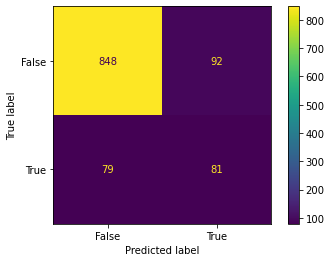

In [53]:
rf_best = RandomForestClassifier(max_depth=None, max_leaf_nodes=75, n_estimators=250, random_state=42, class_weight='balanced')
rf_best.fit(X_train_processed, y_train)
evaluate(rf_best, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

In [50]:
features = rf_best.feature_importances_
feature_importances = dict(zip(X_test_processed.columns, features))
feature_importances

{'account_length': 0.1270660379207153,
 'total_day_calls': 0.12187171510394063,
 'total_eve_calls': 0.11593852887672483,
 'total_night_calls': 0.12145102893438298,
 'total_intl_calls': 0.07450438535415871,
 'customer_service_calls': 0.20794875693581835,
 'x0_415': 0.014923589519370964,
 'x0_510': 0.01386125489433646,
 'int_plan_yes': 0.15690913194025474,
 'vmail_plan_yes': 0.0455255705202971}

In [51]:
X.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls'],
      dtype='object')

[0.12699847 0.12160293 0.11682301 0.12274063 0.07361384 0.20647092
 0.01499626 0.01355438 0.15728582 0.04591374]


<AxesSubplot:>

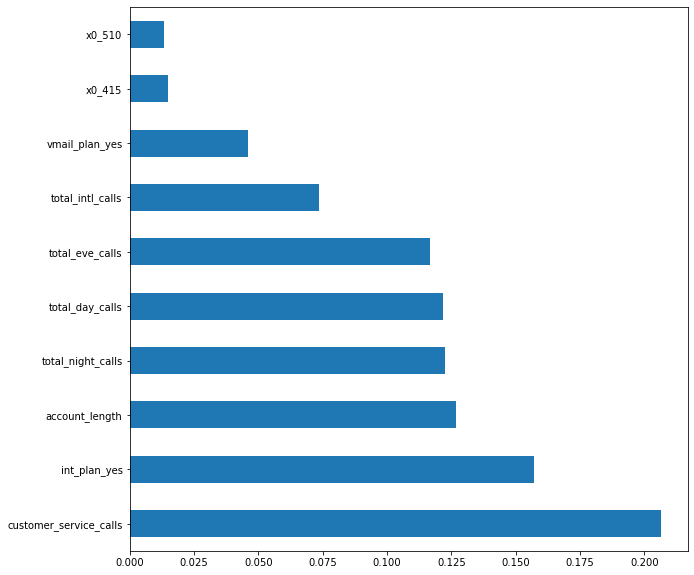

In [55]:
# Get feature importance from the classifier
features = rf_best.feature_importances_
print (rf_best.feature_importances_)
feature_importances = pd.Series(rf_best.feature_importances_, index=X_train_processed.columns)
feature_importances = feature_importances.nlargest(10)
feature_importances.plot(kind='barh' , figsize=(10,10)) 